In [1]:
"""Converts MNIST data to TFRecords file format with Example protos."""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import os
import sys
## generating the training batches
import numpy as np
import scipy.io
from array import array
import pandas as pd
from PIL import Image

import tensorflow as tf

from matplotlib.pyplot import imshow
%matplotlib inline

In [7]:
def data_list(data_dir, label_dir, num_examples, k):
    '''
    imports: pandas, os, numpy, PIL
    '''
    width = 512
    height = 512
    #get labels csv into pandas df
    #below line assumes 
    label_file_name = os.listdir(label_dir)[0]
    label_pd = pd.read_csv(label_dir + label_file_name)
    #initilize container list
    data = [[],[],[]]
    #get filenames om images
    filenames = os.listdir(data_dir)
    #below loop retrieved the 
    for im_number in range(k*num_examples,(k+1)*num_examples):
        im = Image.open(data_dir + filenames[im_number]).resize((width, height), Image.ANTIALIAS)
        im = np.asarray(im).reshape(1,width, height, 3)
        name = filenames[im_number].replace(".jpeg", "")
        label = label_pd.loc[label_pd['image'] == name].iloc[0]['level']
        data[0].append(name)
        data[1].append(im)
        data[2].append(label)
        
    return(data)

In [3]:
label_dir = '/home/olle/PycharmProjects/Diabetic_Retinopathy_Detection/data/labels/'
data_dir = '/home/olle/PycharmProjects/Diabetic_Retinopathy_Detection/data/orig_images/train/'


In [8]:
filenames = os.listdir(data_dir)
len(filenames)

35126

In [10]:
filenames = os.listdir(data_dir)
num_examples = int(len(filenames)/10000)
for i in range(0,5):
    data = data_list(data_dir, label_dir, num_examples, i)
    
    class data_set(object):
        pass

    train_images = np.vstack(data[1])
    train_labels = np.asarray(data[2])

    #train_images = train_images.transpose()
    #train_images = np.swapaxes(train_images, 1, 3)

    data_set.images = train_images
    data_set.labels = train_labels
    data_set.names = data[0]
    data_set.num_examples = data_set.labels.shape[0]

    #print(data[2])
    #print(data_set.labels)
    print(data_set.images.shape)
    print(len(data_set.images[0].tostring()))
    #print("data_batch_{}.bin".format(i))
    
print(data_set.num_examples)

(3, 512, 512, 3)
786432
(3, 512, 512, 3)
786432
(3, 512, 512, 3)
786432
(3, 512, 512, 3)
786432
(3, 512, 512, 3)
786432
3


In [19]:
data_set.images[0]
#np.ones((3,3)).dtype

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [20]:
len(np.ones((512,512,3)).astype(np.uint8).tostring())

786432

0


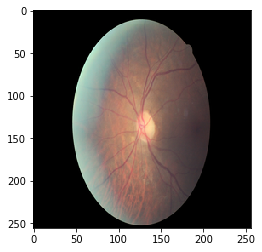

In [12]:
#see so image is correct
print(data_set.labels[0])
imshow(data_set.images[0])

In [ ]:
type(np.asarray(data[2]))

'10_left'

In [19]:
data_dir = '/home/olle/PycharmProjects/Diabetic_Retinopathy_Detection/data/train/train/'
filenames = os.listdir(data_dir)
len(filenames)

35126